In [19]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

In [20]:
def summarize_gcp_file(gcp_filepath, vis=True):
    # Read in the correspondences between the two files
    gcps_df = pd.read_csv(gcp_filepath, delimiter=",", skiprows=1)

    map_coords = gcps_df[["mapX", "mapY"]].to_numpy()
    source_coords = gcps_df[["sourceX", "sourceY"]].to_numpy()

    directions = source_coords - map_coords

    mean_shift = np.mean(directions, axis=0, keepdims=True)
    residuals = directions - mean_shift

    residual_sd = np.std(residuals, axis=0)

    if vis:
        plt.scatter(map_coords[:, 0], map_coords[:, 1])
        plt.scatter(source_coords[:, 0], source_coords[:, 1])
        for dir, map_coord in zip(directions, map_coords):
            plt.quiver(map_coord[0], map_coord[1], dir[0], dir[1],  scale=5e-2, units="xy", color="r")

        for dir, map_coord in zip(residuals, map_coords):
            plt.quiver(map_coord[0], map_coord[1], dir[0], dir[1],  scale=1e-2, units="xy", color="k")

        plt.title("Shift (red, 20x) and residual (black, 100x)")
        plt.show()


    return mean_shift, residual_sd

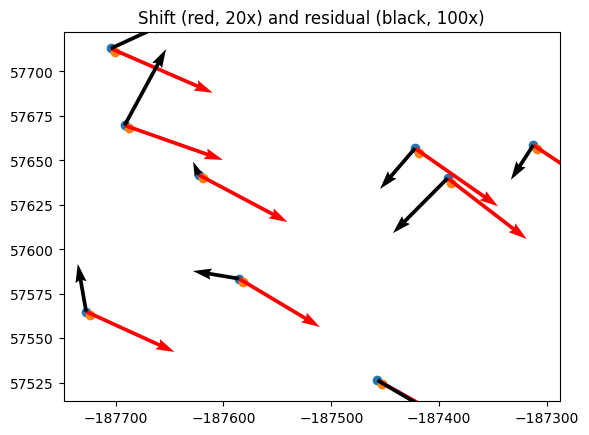

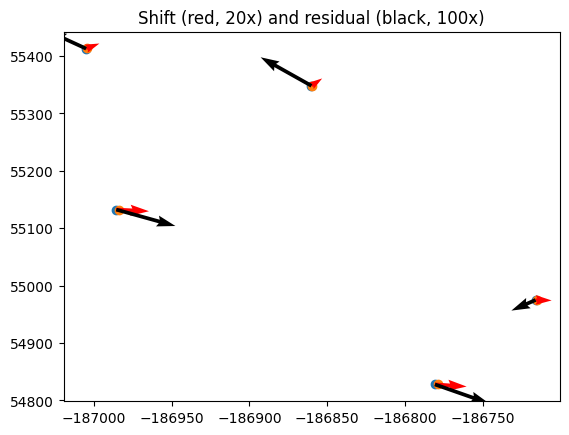

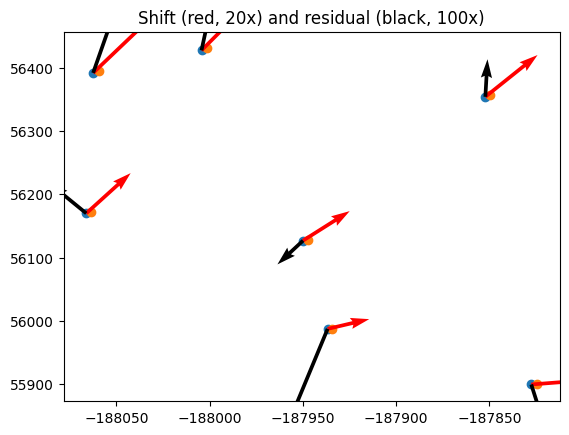

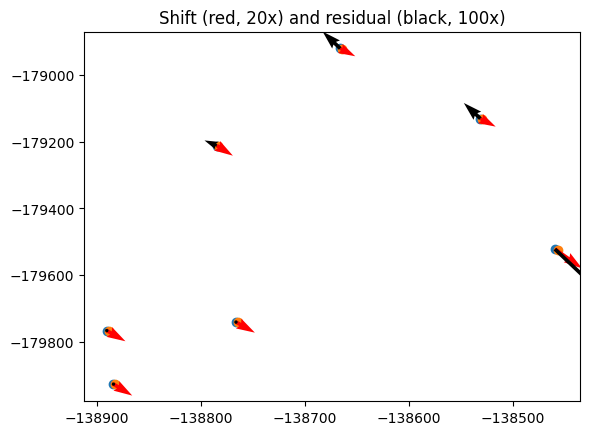

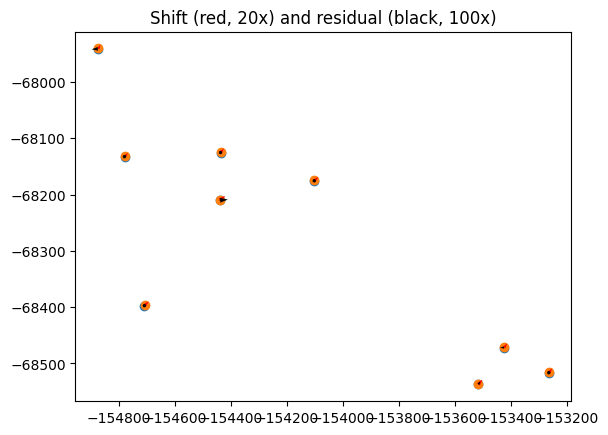

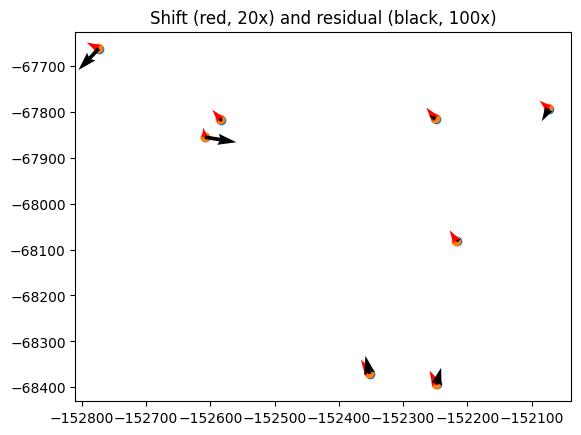

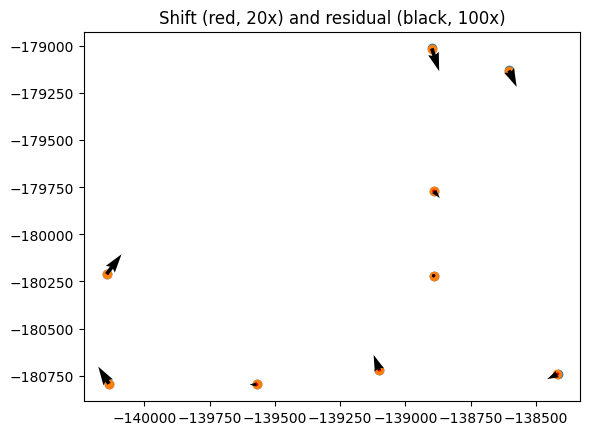

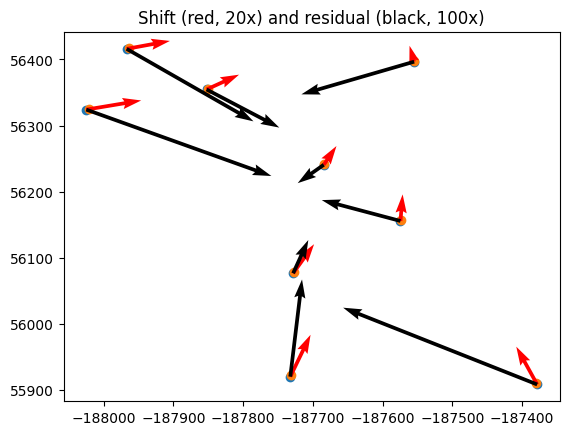

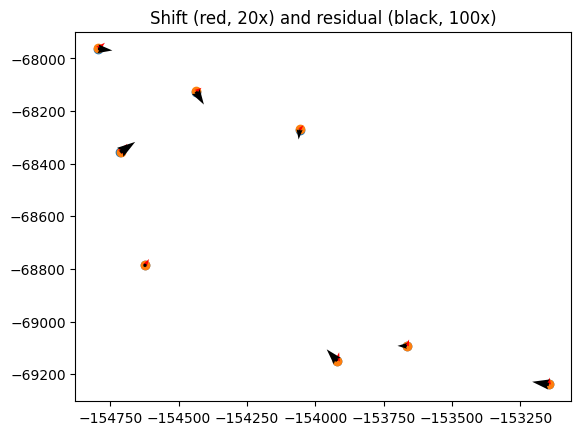

[[ 3.67333011 -2.03344836]
 [ 1.21451527  0.09520919]
 [ 2.6858655   1.77633428]
 [ 1.81378553 -1.08913454]
 [ 0.57881108  0.64201424]
 [-0.71228349  0.94996558]
 [ 0.06633053 -0.01025167]
 [ 1.30942181  1.63943084]
 [ 0.7517346   1.18608131]]
[[0.35715979 0.35128762]
 [0.54644195 0.22418647]
 [0.37194138 1.00138287]
 [0.37660108 0.35005641]
 [0.12214803 0.04970128]
 [0.25239607 0.22634057]
 [0.38357742 0.62079818]
 [1.64002885 0.83578679]
 [0.40892001 0.29894727]]


In [21]:
GCP_FILES = [
    "01ON630.tif.points",
    "02ON919.tif.points",
    "03ON921.tif.points",
    "04ON618.tif.points",
    "05ON612.tif.points",
    "06ON911.tif.points",
    "07ON913.tif.points",
    "08ON921.tif.points",
    "09ON908.tif.points"
]
GCP_FOLDER = "/ofo-share/repos-david/geospatial-data-registration-toolkit/scratch/GCPs"

means = []
residuals = []

for gcp_file in GCP_FILES:
    gcp_filepath = Path(GCP_FOLDER, gcp_file)
    mean_shift, residual_sd = summarize_gcp_file(gcp_filepath, vis=True)
    means.append(mean_shift[0])
    residuals.append(residual_sd)

print(np.array(means))
print(np.array(residuals))